In [1]:
###Mount google drive:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Pre-processing**

In [ ]:
###I want to read all the parquets by year:
import os
import pandas as pd

# Define the path to the data folder
data_path = '/content/gdrive/MyDrive/Hackaton/ANALYTICS/'

# Create an empty list to store the dataframes
dfs = []

# Loop through the year folders
for year_folder in os.listdir(data_path):
    year_path = os.path.join(data_path, year_folder)
    if os.path.isdir(year_path):
        # Loop through the monthly files in each year folder
        for month_file in os.listdir(year_path):
            if month_file.endswith('.parquet.gzip'):
                file_path = os.path.join(year_path, month_file)
                # Read the data in the file into a dataframe and add it to the list of dataframes
                df = pd.read_parquet(file_path)
                dfs.append(df)

# Concatenate the dataframes into a single dataframe
final_df = pd.concat(dfs, ignore_index=True)

In [ ]:
##Some data cleanining: 
# Removing punctuation

def remove_punctuation(value):
    if value.endswith(".0"):
        return value[:-2]
    elif value.endswith(",0"):
        return value[:-2]
    else:
        return value
    
final_df['id_brand'] = final_df.id_brand.astype('string')    
final_df["id_brand"] = final_df["id_brand"].apply(remove_punctuation)
final_df["id_brand"] = final_df["id_brand"].astype('int')

# Changing to date-time

date_cols = ['enrollement_date', 'order_date']
final_df[date_cols] = final_df[date_cols].apply(pd.to_datetime)

In [ ]:
# Define the path and filename where the CSV file should be saved
csv_file = '/content/gdrive/MyDrive/Hackaton/furniture.csv'

# Use the to_csv method to export the dataframe to a CSV file
final_df.to_csv(csv_file, index=False)

In [ ]:
####pRODUCT ID TABLE:
#df_prod = pd.read_parquet('/content/ANALYTICS/Product.parquet.gzip')

df_prod = pd.read_parquet('/content/gdrive/MyDrive/Hackaton/ANALYTICS/Product.parquet.gzip')


In [ ]:
##I need to rename the id_sale in one of the dfs:
df_prod = df_prod.rename(columns={'id_sale': 'id_sale_prod'})

In [ ]:
csv_file = '/content/gdrive/Shareddrives/Hackaton/prod.csv'

# Use the to_csv method to export the dataframe to a CSV file
df_prod.to_csv(csv_file, index=False)

#**Load pre-processed dataframes a**

In [2]:
###Reading CSVs:
import pandas as pd
final_df=pd.read_csv('/content/gdrive/Shareddrives/Hackaton/furniture.csv')
df_prod=pd.read_csv('/content/gdrive/Shareddrives/Hackaton/prod.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,8,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Some Merging and saving dataframes

In [ ]:
##Merging:
#merged_inner= final_df.merge(df_prod, how="inner", left_on="product_id",right_on='id_product')
merged_outer=final_df.merge(df_prod, how="outer", left_on="product_id",right_on='id_product')

In [ ]:
csv_file = '/content/gdrive/Shareddrives/Hackaton/inner_merge.csv'

# Use the to_csv method to export the dataframe to a CSV file
merged_inner.to_csv(csv_file, index=False)

In [ ]:
csv_file = '/content/gdrive/Shareddrives/Hackaton/outer_merge.csv'

# Use the to_csv method to export the dataframe to a CSV file
merged_outer.to_csv(csv_file, index=False)

In [ ]:
final_df.head()

,id_customer,enrollement_date,postcode,city,country,order_date,id_order,id_order_detail,id_sale,id_brand,product_id,product_quantity,base_price,unit_price_TTC,discount_name,discount_value,campaign,MULTI,univers_final,anonymized_id
0,15a3ad6076,2018-07-26,28223,MADRID,Espagne,2019-01-01,06490b8adc,e7602866c2,18941,0,3b523bd3ad,1.0,210.74,100.79,None,0.0,0,Mono,Patio Furniture,e7602866c2
1,15a3ad6076,2018-07-26,28223,MADRID,Espagne,2019-01-01,06490b8adc,caf2d7363a,18941,0,3b523bd3ad,1.0,210.74,100.79,None,0.0,0,Mono,Patio Furniture,caf2d7363a
2,15a3ad6076,2018-07-26,28223,MADRID,Espagne,2019-01-01,06490b8adc,373d7512be,18962,0,1f2d43c302,1.0,9.09,5.55,None,0.0,0,Mono,Pet Supplies,373d7512be
3,15a3ad6076,2018-07-26,28223,MADRID,Espagne,2019-01-01,06490b8adc,18eb60c0f3,18962,0,6b4135fc02,1.0,24.79,12.05,None,0.0,0,Mono,Pet Supplies,18eb60c0f3
4,15a3ad6076,2018-07-26,28223,MADRID,Espagne,2019-01-01,06490b8adc,db8557e76e,18977,0,310ca17664,1.0,173.55,52.94,None,0.0,0,Mono,Rugs,db8557e76e


In [ ]:
##I want to keep the last 5 years of data:
cut_df=final_df[final_df['order_date']>'2017-01-01']

In [ ]:
cut_df=cut_df.drop(columns=["postcode", "id_order_detail","MULTI","anonymized_id"])

In [ ]:
cut_df.shape

(8600639, 16)

In [ ]:
# Define the path and filename where the CSV file should be saved
csv_file = '/content/gdrive/MyDrive/Hackaton/furniture_2017.csv'

# Use the to_csv method to export the dataframe to a CSV file
cut_df.to_csv(csv_file, index=False)

# **CUSTOMER LIFETIME VALUE**

## Setting everything up

In [ ]:
###I'll use all the data from 2011 - 2019
final_df.head()

,id_customer,enrollement_date,postcode,city,country,order_date,id_order,id_order_detail,id_sale,id_brand,product_id,product_quantity,base_price,unit_price_TTC,discount_name,discount_value,campaign,MULTI,univers_final,anonymized_id
0,15a3ad6076,2018-07-26,28223,MADRID,Espagne,2019-01-01,06490b8adc,e7602866c2,18941,0,3b523bd3ad,1.0,210.74,100.79,None,0.0,0,Mono,Patio Furniture,e7602866c2
1,15a3ad6076,2018-07-26,28223,MADRID,Espagne,2019-01-01,06490b8adc,caf2d7363a,18941,0,3b523bd3ad,1.0,210.74,100.79,None,0.0,0,Mono,Patio Furniture,caf2d7363a
2,15a3ad6076,2018-07-26,28223,MADRID,Espagne,2019-01-01,06490b8adc,373d7512be,18962,0,1f2d43c302,1.0,9.09,5.55,None,0.0,0,Mono,Pet Supplies,373d7512be
3,15a3ad6076,2018-07-26,28223,MADRID,Espagne,2019-01-01,06490b8adc,18eb60c0f3,18962,0,6b4135fc02,1.0,24.79,12.05,None,0.0,0,Mono,Pet Supplies,18eb60c0f3
4,15a3ad6076,2018-07-26,28223,MADRID,Espagne,2019-01-01,06490b8adc,db8557e76e,18977,0,310ca17664,1.0,173.55,52.94,None,0.0,0,Mono,Rugs,db8557e76e


In [3]:
###I need only 5 columns for the clv
clv_df=final_df.drop(columns=["postcode", "id_order_detail","MULTI","anonymized_id","city","id_sale","id_brand","product_id","base_price","discount_name","discount_value","campaign"])

In [ ]:
###I'll use all the data from 2011 - 2019
clv_df.head()

,id_customer,enrollement_date,country,order_date,id_order,product_quantity,unit_price_TTC,univers_final
0,15a3ad6076,2018-07-26,Espagne,2019-01-01,06490b8adc,1.0,100.79,Patio Furniture
1,15a3ad6076,2018-07-26,Espagne,2019-01-01,06490b8adc,1.0,100.79,Patio Furniture
2,15a3ad6076,2018-07-26,Espagne,2019-01-01,06490b8adc,1.0,5.55,Pet Supplies
3,15a3ad6076,2018-07-26,Espagne,2019-01-01,06490b8adc,1.0,12.05,Pet Supplies
4,15a3ad6076,2018-07-26,Espagne,2019-01-01,06490b8adc,1.0,52.94,Rugs


In [4]:
clv_df.shape #around 14 million-

(14569473, 8)

In [5]:
!pip install lifetimes
import lifetimes #using lifetimes library
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from lifetimes import BetaGeoFitter # BG/NBD
from lifetimes import GammaGammaFitter # Gamma-Gamma Model
from lifetimes.plotting import plot_frequency_recency_matrix
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 KB 9.7 MB/s eta 0:00:00


In [ ]:
clv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14569473 entries, 0 to 14569472
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id_customer       object 
 1   enrollement_date  object 
 2   country           object 
 3   order_date        object 
 4   id_order          object 
 5   product_quantity  float64
 6   unit_price_TTC    float64
 7   univers_final     object 
dtypes: float64(2), object(6)
memory usage: 889.3+ MB


In [6]:
##Some pre-processing 
clv_df = clv_df[clv_df['product_quantity'] > 0 ] # exclude the orders with 0 value
clv_df = clv_df[clv_df['unit_price_TTC'] > 0] # exclude the Unit Price with 0 value

In [7]:
clv_df.shape # so there were some ppl with either 0

(14502724, 8)

In [ ]:
##No nulls value - good!
clv_df.isnull().sum()

id_customer         0
enrollement_date    0
country             0
order_date          0
id_order            0
product_quantity    0
unit_price_TTC      0
univers_final       0
dtype: int64

In [8]:
##Should we choose to handle outliers this is an option to cap their values:
def find_boundaries(df, variable,q1=0.05,q2=0.95):
# the boundaries are the quantiles
    lower_boundary = df[variable].quantile(q1) # lower quantile
    upper_boundary = df[variable].quantile(q2) # upper quantile
    return upper_boundary, lower_boundary
def capping_outliers(df,variable):
    upper_boundary,lower_boundary =  find_boundaries(df,variable)
    df[variable] = np.where(df[variable] > upper_boundary, upper_boundary,
                       np.where(df[variable] < lower_boundary, lower_boundary, df[variable]))

In [9]:
##We cap outliers for unit price and quanity
capping_outliers(clv_df,'unit_price_TTC')
capping_outliers(clv_df,'product_quantity')

In [ ]:
clv_df.shape # so there were some ppl with 0

(14502724, 8)

In [67]:
##We can see the difference in the values after capping them.
clv_df.describe()

,product_quantity,unit_price_TTC,Total Price
count,1.450272e+07,1.450272e+07,1.450272e+07
mean,1.053996e+00,3.038925e+01,3.121513e+01
std,2.260098e-01,2.615939e+01,2.672403e+01
min,1.000000e+00,4.990000e+00,4.990000e+00
25%,1.000000e+00,1.150000e+01,1.195000e+01
50%,1.000000e+00,2.028000e+01,2.195000e+01
75%,1.000000e+00,3.995000e+01,3.995000e+01
max,2.000000e+00,1.016300e+02,2.032600e+02


In [10]:
##We compute the total price 
clv_df['Total Price'] = clv_df['unit_price_TTC'] * clv_df['product_quantity']

In [68]:
clv_df.sort_values(by=['order_date'],ascending=True)

,id_customer,enrollement_date,country,order_date,id_order,product_quantity,unit_price_TTC,univers_final,Total Price
11621434,e6d8545daa,2011-03-04,France,2011-03-04,6f4922f455,1.0,101.63,Other,101.63
11621436,e6d8545daa,2011-03-04,France,2011-03-04,6f4922f455,1.0,37.38,Other,37.38
11621435,e6d8545daa,2011-03-04,France,2011-03-04,6f4922f455,1.0,20.80,Other,20.80
11621433,93fb9d4b16,2011-03-04,France,2011-03-04,70efdf2ec9,2.0,37.38,Other,74.76
11621431,dc87c13749,2011-03-04,France,2011-03-04,c74d97b01e,1.0,37.38,Other,37.38
...,...,...,...,...,...,...,...,...,...
2969617,456835d36f,2016-08-29,France,2019-12-31,70039b4a9f,1.0,59.99,Video Games,59.99
2969616,ce5e02cf68,2019-03-18,France,2019-12-31,723d2ac0a7,1.0,23.99,Health & Household,23.99
2969615,553a89a4d6,2019-12-30,France,2019-12-31,9da82cb6af,1.0,77.99,Bathroom Accessories,77.99
2969643,61b0c48ece,2017-11-24,France,2019-12-31,4b5f9aad14,1.0,4.99,Handmade,4.99


In [ ]:
clv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14502724 entries, 0 to 14569472
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id_customer       object 
 1   enrollement_date  object 
 2   country           object 
 3   order_date        object 
 4   id_order          object 
 5   product_quantity  float64
 6   unit_price_TTC    float64
 7   univers_final     object 
 8   Total Price       float64
dtypes: float64(3), object(6)
memory usage: 1.1+ GB


In [ ]:
clv_df.head()

,id_customer,enrollement_date,country,order_date,id_order,product_quantity,unit_price_TTC,univers_final,Total Price
0,15a3ad6076,2018-07-26,Espagne,2019-01-01,06490b8adc,1.0,100.79,Patio Furniture,100.79
1,15a3ad6076,2018-07-26,Espagne,2019-01-01,06490b8adc,1.0,100.79,Patio Furniture,100.79
2,15a3ad6076,2018-07-26,Espagne,2019-01-01,06490b8adc,1.0,5.55,Pet Supplies,5.55
3,15a3ad6076,2018-07-26,Espagne,2019-01-01,06490b8adc,1.0,12.05,Pet Supplies,12.05
4,15a3ad6076,2018-07-26,Espagne,2019-01-01,06490b8adc,1.0,52.94,Rugs,52.94


## RFM Analysis



*   Frequency represents the number of repeat purchases the customer has made. This means that it’s one less than the total number of purchases. This is actually slightly wrong. It’s the count of time periods the customer had a purchase in. So if using days as units, then it’s the count of days the customer had a purchase on.
*   Recency represents the age of the customer when they made their most recent purchases. This is equal to the duration between a customer’s first purchase and their latest purchase. (Thus if they have made only 1 purchase, the recency is 0.)
*   T represents the age of the customer at whatever time units are chosen (weekly, in the above dataset). This is equal to the duration between a customer’s first purchase and the end of the period under study.
*   Monetary Value represents the average value of a given customer’s purchases. This is equal to the sum of all a customer’s purchases divided by the total number of purchases. Note that the denominator here is different than the frequency described above.





In [72]:
##We'll build th efrequency, recency, Senioity, monetary value of the customers by using an observation period up to the end of 2019
clv = lifetimes.utils.summary_data_from_transaction_data(clv_df,'id_customer','order_date','Total Price',observation_period_end='2020-01-01')

In [ ]:
##Check the shape
clv.shape

(2159680, 4)

In [73]:
##We will keep the clv for everyone who made at least two orders
clv = clv[clv['frequency']>0] # we want only customers shopped more than 2 times

In [ ]:
clv.shape # half of our historical clients only placed one order.

(1075522, 4)

## Fitting the PNBD model to compute CLV

In [74]:
###We fit the model with a penalizer based on frequency recency and age.
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(clv['frequency'], clv['recency'], clv['T'])

<lifetimes.BetaGeoFitter: fitted with 1075522 subjects, a: 0.58, alpha: 303.86, b: 1.72, r: 1.84>

In [75]:
###Now we will implement a BG/NBD to predict the number of purchases
t = 180 # we'll predict for 6 months
clv['expected_purc_6_months'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, clv['frequency'], clv['recency'], clv['T'])
clv.sort_values(by='expected_purc_6_months',ascending=False).head(5)

,frequency,recency,T,monetary_value,expected_purc_6_months
id_customer,,,,,
41db345920,174.0,855.0,856.0,19.549195,26.039377
b21f728b4d,132.0,1072.0,1078.0,37.433182,16.679010
5147befdd9,75.0,471.0,474.0,103.458667,16.529105
f84ed91cf9,153.0,1407.0,1426.0,129.261046,15.323778
0fddb23133,115.0,1061.0,1062.0,38.869565,14.759709


In [70]:
##Now we will use the GAMMA GAMMA MODEL TO USE THE MONETARY VALUE TO PREDICT CLV
##First we check the assumptions of the model:
clv[['frequency','monetary_value']].corr() # around 0.04 seems like there is no correlation which is good!

,frequency,monetary_value
frequency,1.000000,0.036151
monetary_value,0.036151,1.000000


In [76]:
###Lets predict CLV
ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(clv["frequency"],
        clv["monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 1075522 subjects, p: 4.22, q: 0.68, v: 4.03>

In [77]:
##We add the predicted clv to our clv dataframe and then sort by descending clv value
clv['6_Months_clv']=ggf.customer_lifetime_value(bgf,
                                   clv["frequency"],
                                   clv["recency"],
                                   clv["T"],
                                   clv["monetary_value"],
                                   time=6,
                                   freq='D',
                                   discount_rate=0.01)
clv.sort_values('6_Months_clv',ascending=False).head()

,frequency,recency,T,monetary_value,expected_purc_6_months,6_Months_clv
id_customer,,,,,,
9726407879,13.0,633.0,668.0,1210.514615,2.430582,2860.648341
1dc729f03b,53.0,1140.0,1152.0,437.396038,6.438228,2725.308660
eba5569fe9,165.0,1719.0,1736.0,188.997818,14.156767,2586.527033
cc18077768,54.0,750.0,758.0,278.403519,8.886636,2394.779645
c396569818,7.0,48.0,81.0,765.368571,3.132618,2345.450745


##Revenue analysis to determine the segments

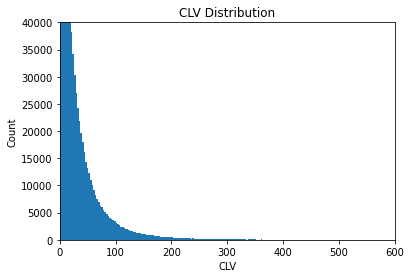

In [ ]:
###Lets explore the CLV data: 
import matplotlib.pyplot as plt
import pandas as pd

# Plot CLV distribution using a histogram
plt.hist(clv['6_Months_clv'], bins=1000)
plt.title('CLV Distribution')
plt.xlabel('CLV')
plt.xlim((0,600))
plt.ylim((0,40000))
plt.ylabel('Count')
plt.show()



In [78]:
##I build a revenue column in the original dataset.
final_df['revenue']=final_df['unit_price_TTC']*final_df['product_quantity']
##I group by id_customer and sum the revenues together.


In [79]:
# Group the DataFrame by customer ID and calculate the sum of revenue for each customer
revenue_by_customer = final_df.groupby('id_customer')['revenue'].sum()

# Sort the resulting Series in descending order
revenue_by_customer_sorted = revenue_by_customer.sort_values(ascending=False)

# Print the resulting Series
print(revenue_by_customer_sorted)

id_customer
40ec6f0ea4    98324.44
df7ec589f0    84971.51
0888eb74e3    75915.84
a2dcf0f245    56999.43
98f1370821    50546.97
                ...   
b67e13cdbc       -0.20
b182f99ddf       -0.25
09d40fe624       -0.50
a69aee97fd       -0.60
c3ae2e9ec7       -1.40
Name: revenue, Length: 1964691, dtype: float64


In [80]:
##We compute the total sum of revenues
Total_rev=revenue_by_customer_sorted.sum()

In [24]:
##We can use this to find the correspondance between the amount of customers and the share of revenue they represent,
cumulative_sum = 0
num_customers = 0
share=0.95
for revenue in revenue_by_customer_sorted:
    cumulative_sum += revenue # we do cumulative sum customer my customer
    num_customers += 1 # add to customer count
    if cumulative_sum >= Total_rev* share: # if we reach a certain percentage of revenue we stop
        break
print(f"Number of customers that make up {share} of revenue:", num_customers)
print(f"Percentage of customers that make up {share} of revenue:", num_customers/final_df['id_customer'].nunique())

print(cumulative_sum)


####We will use this to choose the quantiles for the segments
##Top group will be the top 10% of our customers who represent the 50% of our total revenue since 2011
##Our second big group will be the 24% who add up that represent the other 30% of the revenue(together they make up 80% of the revenue)
## The last group will be the rest of the customers.

Number of customers that make up 80% of revenue: 1438678
Percentage of customers that make up 80% of revenue: 0.6632166151970987
523307990.6987897


##Segmentation

In [82]:
###Now we will segment into groups based on the CLV

# Define the bin edges based on percentiles
clv_sorted = clv.sort_values(by='6_Months_clv',ascending=False) #we sort again just in case

##The percentiles values were found by doing a correspondance based on the values tested on the previous code block.
bin_edges = [0, np.percentile(clv_sorted['6_Months_clv'], 65), np.percentile(clv_sorted['6_Months_clv'], 90), np.inf] #3 segments

# Segment into groups based on CLV percentiles
clv_sorted['Segment'] = pd.cut(clv_sorted['6_Months_clv'], bins=bin_edges, labels=['Lost', 'Loyal Base', 'Golden eggs'])


In [26]:
##  Grouping by segment:
clv_sorted.groupby('Segment').mean()
##Now the champions represent 50 % of the revenue
## Loyal customer around 30
##And lost + customers who only did one purchase the rest.

,frequency,recency,T,monetary_value,expected_purc_6_months,6_Months_clv
Segment,,,,,,
Lost,2.574089,591.621319,1473.388559,59.709017,0.142191,7.344674
Loyal Base,4.893938,942.325000,1143.190832,80.359514,0.595319,40.796943
Golden eggs,10.212119,905.239166,988.246167,108.875721,1.371911,127.979239


In [95]:
##This is to compute some metrics
table=clv_sorted.groupby('Segment').mean()
#table=table.drop(columns=["6_Months_clv",'expected_purc_6_months'])
table = table.rename(columns={'frequency':'Frequency','recency':"Recency", 'T': 'Seniority','expected_purc_6_months':'Avg Expected #of purchases in 6 months','6_Months_clv':'Expected Avg. 6 month clv'})
table['Recency']=table['Recency']/30
table['Seniority']=table['Seniority']/30

In [97]:
table

,Frequency,Recency,Seniority,monetary_value,Avg Expected #of purchases in 6 months,Expected Avg. 6 month clv
Segment,,,,,,
Lost,2.574089,19.720711,49.112952,59.709017,0.142191,7.344674
Loyal Base,4.893938,31.410833,38.106361,80.359514,0.595319,40.796943
Golden eggs,10.212119,30.174639,32.941539,108.875721,1.371911,127.979239


####Some general metrics of rfm and clv for all the customers

In [109]:
metrics=clv_sorted.mean()
#metrics = metrics.rename(columns={'frequency':'Frequency','recency':"Recency", 'T': 'Seniority','expected_purc_6_months':'Avg Expected #of purchases in 6 months','6_Months_clv':'Expected Avg. 6 month clv'})
Age=metrics['T']/30
Recency=metrics['recency']/30
print(Age, Recency, metrics)

44.74415601602447 23.688636463658266 frequency                    3.917858
recency                    710.659094
T                         1342.324680
monetary_value              69.788339
expected_purc_6_months       0.378446
6_Months_clv                27.771272
dtype: float64


In [113]:
metrics_median=clv_sorted.median()
#metrics = metrics.rename(columns={'frequency':'Frequency','recency':"Recency", 'T': 'Seniority','expected_purc_6_months':'Avg Expected #of purchases in 6 months','6_Months_clv':'Expected Avg. 6 month clv'})
Age=metrics_median['T']/30
Recency=metrics_median['recency']/30
print(Age, Recency, metrics_median)

42.4 18.033333333333335 frequency                    2.000000
recency                    541.000000
T                         1272.000000
monetary_value              60.351190
expected_purc_6_months       0.218113
6_Months_clv                13.190911
dtype: float64


#**Category Analysis**

In [ ]:
###Now I want to calculate the share of purchases per category since 2015
final_df.head()

,id_customer,enrollement_date,postcode,city,country,order_date,id_order,id_order_detail,id_sale,id_brand,product_id,product_quantity,base_price,unit_price_TTC,discount_name,discount_value,campaign,MULTI,univers_final,anonymized_id,revenue
0,15a3ad6076,2018-07-26,28223,MADRID,Espagne,2019-01-01,06490b8adc,e7602866c2,18941,0,3b523bd3ad,1.0,210.74,100.79,NaN,0.0,0,Mono,Patio Furniture,e7602866c2,100.79
1,15a3ad6076,2018-07-26,28223,MADRID,Espagne,2019-01-01,06490b8adc,caf2d7363a,18941,0,3b523bd3ad,1.0,210.74,100.79,NaN,0.0,0,Mono,Patio Furniture,caf2d7363a,100.79
2,15a3ad6076,2018-07-26,28223,MADRID,Espagne,2019-01-01,06490b8adc,373d7512be,18962,0,1f2d43c302,1.0,9.09,5.55,NaN,0.0,0,Mono,Pet Supplies,373d7512be,5.55
3,15a3ad6076,2018-07-26,28223,MADRID,Espagne,2019-01-01,06490b8adc,18eb60c0f3,18962,0,6b4135fc02,1.0,24.79,12.05,NaN,0.0,0,Mono,Pet Supplies,18eb60c0f3,12.05
4,15a3ad6076,2018-07-26,28223,MADRID,Espagne,2019-01-01,06490b8adc,db8557e76e,18977,0,310ca17664,1.0,173.55,52.94,NaN,0.0,0,Mono,Rugs,db8557e76e,52.94


In [57]:
# Convert the transaction date column to datetime format
final_df['order_date'] = pd.to_datetime(final_df['order_date'])

# Filter transactions from 2015 onwards
final_df = final_df[final_df['order_date'] >= '2015-01-01']
##We do this because before 2015 all categories were other

In [64]:
final_df.shape

(12381144, 21)

### We want to get how much in percentage did our customers spend in each category

In [58]:
# Pivot the table to have categories as columns and customer IDs as rows
pivoted_df = pd.pivot_table(final_df, values='revenue', index='id_customer', columns='univers_final', aggfunc=np.sum, fill_value=0)

# Compute the total revenue for each customer
pivoted_df['total_revenue'] = pivoted_df.sum(axis=1)

# Compute the percentage spend for each category
for category in pivoted_df.columns[:-1]:
    pivoted_df[category] = pivoted_df[category] / pivoted_df['total_revenue'] * 100

# Drop the total revenue column
pivoted_df = pivoted_df.drop('total_revenue', axis=1)


In [65]:
##In this table we have the share of money spend in each category for all customers since 2015
pivoted_df.head()

univers_final,"Arts, Crafts & Sewing",Automotive,Bathroom Accessories,Beauty & Personal Care,Bedroom Furniture,Books,"Clothing, Shoes & Jewelry",Dining Room Furniture,Electronics,Furniture,Handmade,Health & Household,Home & Kitchen,Home Decor,Home Improvement,Industrial & Scientific,Kitchen & Dining,Kitchen Furniture,Lighting Fixtures,Living Room Furniture,Luggage & Travel Gear,Mattresses,Movies & TV,"Music, Movies & TV Shows",Other,Outdoor Furniture,Outdoor Lighting,Patio Furniture,"Patio, Lawn & Garden",Pet Supplies,Rugs,Software,Sports & Outdoors,Storage & Organization,Tools & Home Improvement,Toys & Games,Video Games,Wall Art
id_customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00000c0aa1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00000ce845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00001aa482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.169611,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,5.830389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00002612b1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
00002852a4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,78.846154,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.153846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pivoted_df.shape #Now I need to merge this with my clv database to get the customers and their respective shares per category to compute the clv per category.

(1964691, 38)

In [ ]:
pivoted_df.columns[:].to_list()

['Arts, Crafts & Sewing',
 'Automotive',
 'Bathroom Accessories',
 'Beauty & Personal Care',
 'Bedroom Furniture',
 'Books',
 'Clothing, Shoes & Jewelry',
 'Dining Room Furniture',
 'Electronics',
 'Furniture',
 'Handmade',
 'Health & Household',
 'Home & Kitchen',
 'Home Decor',
 'Home Improvement',
 'Industrial & Scientific',
 'Kitchen & Dining',
 'Kitchen Furniture',
 'Lighting Fixtures',
 'Living Room Furniture',
 'Luggage & Travel Gear',
 'Mattresses',
 'Movies & TV',
 'Music, Movies & TV Shows',
 'Other',
 'Outdoor Furniture',
 'Outdoor Lighting',
 'Patio Furniture',
 'Patio, Lawn & Garden',
 'Pet Supplies',
 'Rugs',
 'Software',
 'Sports & Outdoors',
 'Storage & Organization',
 'Tools & Home Improvement',
 'Toys & Games',
 'Video Games',
 'Wall Art']

In [83]:
clv_sorted.head()

,frequency,recency,T,monetary_value,expected_purc_6_months,6_Months_clv,Segment
id_customer,,,,,,,
9726407879,13.0,633.0,668.0,1210.514615,2.430582,2860.648341,Golden eggs
1dc729f03b,53.0,1140.0,1152.0,437.396038,6.438228,2725.308660,Golden eggs
eba5569fe9,165.0,1719.0,1736.0,188.997818,14.156767,2586.527033,Golden eggs
cc18077768,54.0,750.0,758.0,278.403519,8.886636,2394.779645,Golden eggs
c396569818,7.0,48.0,81.0,765.368571,3.132618,2345.450745,Golden eggs


### Now we want to merge our shares with the clv and compute a weighted CLV per category

In [59]:
# Merge the two dataframes clv and share spend in each category
merged_df = pd.merge(pivoted_df, clv_sorted, on='id_customer')
merged_df.shape
# Compute the CLV per category by weighting by the percentage spend in each category
category_list=pivoted_df.columns[:].to_list()
for category in category_list:
    merged_df[category+'_CLV'] = merged_df['6_Months_clv'] * (merged_df[category] / 100)

# View the resulting dataframe
print(merged_df)


             Arts, Crafts & Sewing  Automotive  Bathroom Accessories  Beauty & Personal Care  Bedroom Furniture  Books  Clothing, Shoes & Jewelry  Dining Room Furniture  Electronics  Furniture  Handmade  Health & Household  Home & Kitchen  Home Decor  Home Improvement  Industrial & Scientific  Kitchen & Dining  Kitchen Furniture  Lighting Fixtures  Living Room Furniture  Luggage & Travel Gear  Mattresses  Movies & TV  Music, Movies & TV Shows       Other  Outdoor Furniture  Outdoor Lighting  Patio Furniture  Patio, Lawn & Garden  Pet Supplies      Rugs  Software  Sports & Outdoors  Storage & Organization  Tools & Home Improvement  Toys & Games  Video Games  Wall Art  frequency   recency         T  monetary_value  expected_purc_6_months  6_Months_clv      Segment  Arts, Crafts & Sewing_CLV  Automotive_CLV  Bathroom Accessories_CLV  Beauty & Personal Care_CLV  Bedroom Furniture_CLV  Books_CLV  Clothing, Shoes & Jewelry_CLV  Dining Room Furniture_CLV  Electronics_CLV  Furniture_CLV  \
id_

In [ ]:
##We save the file to a csv.
# Define the path and filename where the CSV file should be saved
csv_file = '/content/gdrive/Shareddrives/Hackaton/clv_ind_2015.csv'

# Use the to_csv method to export the dataframe to a CSV file
merged_df.to_csv(csv_file, index=False)

In [ ]:
merged_df.columns.to_list()[45:] # 38 categories.

38

In [114]:
# Compute average CLV for each category
category_means = {}
category_total={}
category_list=merged_df.columns.to_list()[45:]
for category in category_list:
    non_zero_values = merged_df[merged_df[category] != 0][category]
    category_mean = np.mean(non_zero_values)
    category_sum=np.sum(non_zero_values)
    category_means[category] = category_mean
    category_total[category] = round(category_sum)



print(category_means)
print(category_total)


{'Arts, Crafts & Sewing_CLV': 9.018554374137207, 'Automotive_CLV': 1.9939726381295977, 'Bathroom Accessories_CLV': 20.61467201615314, 'Beauty & Personal Care_CLV': 3.0671961561207364, 'Bedroom Furniture_CLV': 5.551316869840399, 'Books_CLV': 6.350150407406671, 'Clothing, Shoes & Jewelry_CLV': 6.331490834233808, 'Dining Room Furniture_CLV': 6.496059852160442, 'Electronics_CLV': 9.610693466353485, 'Furniture_CLV': 6.937031968883169, 'Handmade_CLV': 8.268058520281217, 'Health & Household_CLV': 6.677217712620702, 'Home & Kitchen_CLV': 4.676618221514854, 'Home Decor_CLV': 9.402668850894639, 'Home Improvement_CLV': 11.598028059491275, 'Industrial & Scientific_CLV': 6.1197166514831105, 'Kitchen & Dining_CLV': 8.852111891769876, 'Kitchen Furniture_CLV': 7.296466400430779, 'Lighting Fixtures_CLV': 2.9358356295572983, 'Living Room Furniture_CLV': 4.299984131159502, 'Luggage & Travel Gear_CLV': 2.8054643500991556, 'Mattresses_CLV': 9.157657812093456, 'Movies & TV_CLV': 4.00356593549818, 'Music, Mo

### Merging everything an taking the average and total per category

In [ ]:
##We take the average per category and the total per category and merge them into one dataframe
df_clv_mean = pd.DataFrame(list(category_means.items()), columns=['Category', 'Average_CLV'])
df_clv_mean['Category'] = df_clv_mean['Category'].str.replace('_CLV', '')
df_clv_total = pd.DataFrame(list(category_total.items()), columns=['Category', 'Total_CLV'])
df_clv_total['Category'] = df_clv_total['Category'].str.replace('_CLV', '')
clv_cat = pd.merge(df_clv_mean, df_clv_total, on='Category')



**Then we have the Average CLV per category which is the expected revenue per customer in each category and the Total clv which is the total revenue expected in the following 6 months per category.**

In [ ]:
clv_cat.sort_values(by='Average_CLV',ascending=False).head(50)

,Category,Average_CLV,Total_CLV
2,Bathroom Accessories,20.614672,1540926
27,Patio Furniture,14.594763,1586932
25,Outdoor Furniture,11.728009,1124611
14,Home Improvement,11.598028,897745
26,Outdoor Lighting,10.905056,1016340
30,Rugs,9.998606,2024348
8,Electronics,9.610693,2220599
13,Home Decor,9.402669,153160
21,Mattresses,9.157658,49351
0,"Arts, Crafts & Sewing",9.018554,1978121


In [ ]:
# Define the path and filename where the CSV file should be saved
csv_file = '/content/gdrive/Shareddrives/Hackaton/clv.csv'

# Use the to_csv method to export the dataframe to a CSV file
clv_cat.to_csv(csv_file, index=False)